<a href="https://colab.research.google.com/github/Humaidabdullah/Deep-Learning-PadhAI/blob/master/Sigmoid%20Neuron/SigmoidNeuronAnimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x,self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1-y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1-y_pred) 
  
  def fit(self, X, Y, epochs=1, lr = 1, initialize = True):
    if initialize:
      self.w = np.random.rand(1,X.shape[1]) #(row,col)
      self.b = 0
    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr * dw
      self.b -= lr * db
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [3]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]

In [4]:
sn = SigmoidNeuron()

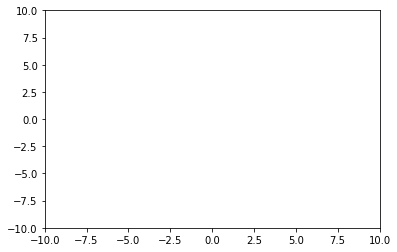

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -10, 10))
ax.set_ylim((-10, 10))

line, = ax.plot([], [], lw=2)

In [6]:
sn.fit(X,Y,1,.75,True)

In [7]:
def return_plot_sn(X,Y,sn):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size): #X2 first then X1
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.clear()
  ax.contourf(XX1,XX2,YY,cmap='viridis')
  ax.scatter(X[:,0],X[:,1],c=Y,cmap = 'viridis')
  return ax

In [8]:
# animation function. This is called sequentially
def animate(i):
  sn.fit(X,Y,1,1,False)   
  return return_plot_sn(X,Y,sn)

In [9]:
anim = animation.FuncAnimation(fig, animate,
                               frames=100, interval=200)

In [10]:
HTML(anim.to_html5_video())